In [138]:
import pandas as pd 
from sklearn import preprocessing

#ML classifier libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Cross-Validation methods libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import cross_val_score

#ML evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#import scikitplot to plot confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('gender-prediction.csv')
df

In [143]:
male_count = 0
female_count = 0

for gender in df['gender']:
    if gender == "male":
        male_count+=1
    else:
        female_count+=1
        
        
print("Male instances:", male_count)
print("Female instances:", female_count)

Male instances: 46
Female instances: 34


## Question 2 part 1

In [70]:
labels = preprocessing.LabelEncoder()

beard_encoded = labels.fit_transform(df['beard'])
hair_length_encoded = labels.fit_transform(df['hair_length'])
scarf_encoded = labels.fit_transform(df['scarf'])
eye_color_encoded = labels.fit_transform(df['eye_color'])

x_encoded = list(zip(df['height'], df['weight'], beard_encoded, hair_length_encoded, df['shoe_size'], scarf_encoded, eye_color_encoded))

In [71]:
y = df['gender']
y_encoded = labels.fit_transform(y)

In [72]:
X_train, x_test, Y_train, y_test = train_test_split(x_encoded, y_encoded, test_size = 0.33, random_state = 2)

In [73]:
random_forest_model = RandomForestClassifier()
svc_model = SVC()
mlp_model = MLPClassifier()

In [76]:
random_forest_model.fit(X_train,Y_train)
svc_model.fit(X_train,Y_train)
mlp_model.fit(X_train,Y_train)

MLPClassifier()

In [77]:
random_forest_prediction = random_forest_model.predict(x_test)
svc_prediction = svc_model.predict(x_test)
mlp_prediction = mlp_model.predict(x_test)

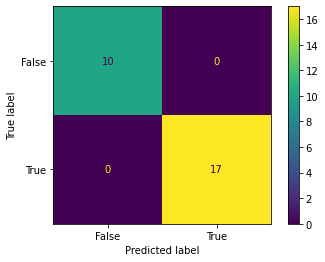

In [ ]:
confusion_matrix_rf = metrics.confusion_matrix(y_test, random_forest_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf, display_labels = [False, True])
cm_display.plot()
plt.show()

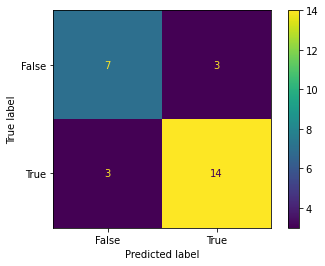

In [88]:
confusion_matrix_svc = metrics.confusion_matrix(y_test, svc_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svc, display_labels = [False, True])
cm_display.plot()
plt.show()

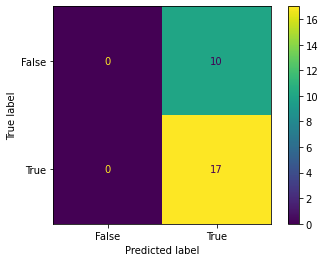

In [86]:
confusion_matrix_mlp = metrics.confusion_matrix(y_test, mlp_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_mlp, display_labels = [False, True])
cm_display.plot()
plt.show()

In [95]:
random_forest_model_acc = accuracy_score(y_test, random_forest_prediction)*100
svc_model_acc = accuracy_score(y_test, svc_prediction)*100
mlp_model_acc = accuracy_score(y_test, mlp_prediction)*100
print("Random forest accuracy", str(round(random_forest_model_acc)), "%")
print("Support Vector Machine accuracy", str(round(svc_model_acc)), "%")
print("Multilayer Perceptron accuracy", str(round(mlp_model_acc)), "%")

Random forest accuracy 100 %
Support Vector Machine accuracy 78 %
Multilayer Perceptron accuracy 63 %


## Question 2 part 2

In [97]:
#using train/test split ratio of 80/20
X_train, x_test, Y_train, y_test = train_test_split(x_encoded, y_encoded, test_size = 0.2, random_state = 2)

In [98]:
random_forest_model = RandomForestClassifier()
svc_model = SVC()
mlp_model = MLPClassifier()

In [103]:
random_forest_model.fit(X_train,Y_train)
svc_model.fit(X_train,Y_train)
mlp_model.fit(X_train,Y_train)

MLPClassifier()

In [104]:
random_forest_prediction = random_forest_model.predict(x_test)
svc_prediction = svc_model.predict(x_test)
mlp_prediction = mlp_model.predict(x_test)

In [105]:
random_forest_model_acc = accuracy_score(y_test, random_forest_prediction)*100
svc_model_acc = accuracy_score(y_test, svc_prediction)*100
mlp_model_acc = accuracy_score(y_test, mlp_prediction)*100
print("Random forest accuracy", str(round(random_forest_model_acc)), "%")
print("Support Vector Machine accuracy", str(round(svc_model_acc)), "%")
print("Multilayer Perceptron accuracy", str(round(mlp_model_acc)), "%")

Random forest accuracy 100 %
Support Vector Machine accuracy 81 %
Multilayer Perceptron accuracy 62 %


## Question 2 part 4

In [107]:
# 2 attributes believed to be most “powerful”
# removing attributes beard and scarf

In [108]:
x_encoded = list(zip(df['height'], df['weight'], hair_length_encoded, df['shoe_size'], eye_color_encoded))
y = df['gender']
y_encoded = labels.fit_transform(y)

In [109]:
X_train, x_test, Y_train, y_test = train_test_split(x_encoded, y_encoded, test_size = 0.2, random_state = 2)

In [110]:
random_forest_model = RandomForestClassifier()
svc_model = SVC()
mlp_model = MLPClassifier()

In [114]:
random_forest_model.fit(X_train,Y_train)
svc_model.fit(X_train,Y_train)
mlp_model.fit(X_train,Y_train)

MLPClassifier()

In [115]:
random_forest_prediction = random_forest_model.predict(x_test)
svc_prediction = svc_model.predict(x_test)
mlp_prediction = mlp_model.predict(x_test)

In [117]:
random_forest_model_acc = accuracy_score(y_test, random_forest_prediction)*100
svc_model_acc = accuracy_score(y_test, svc_prediction)*100
mlp_model_acc = accuracy_score(y_test, mlp_prediction)*100
print("Random forest accuracy", str(round(random_forest_model_acc)), "%")
print("Support Vector Machine accuracy",str(round(svc_model_acc)), "%")
print("Multilayer Perceptron accuracy", str(round(mlp_model_acc)), "%")

Random forest accuracy 94 %
Support Vector Machine accuracy 81 %
Multilayer Perceptron accuracy 62 %


## Question 3

In [51]:
x_encoded = list(zip(df['height'], df['weight'], beard_encoded, hair_length_encoded, df['shoe_size'], scarf_encoded, eye_color_encoded))
y = df['gender']
y_encoded = labels.fit_transform(y)

In [52]:
#Monte Carlo cross-validation
monte_carlo = ShuffleSplit(n_splits=5,test_size=0.33,random_state=7)

In [53]:
decision_tree_model = DecisionTreeClassifier()

In [139]:
monte_carlo_acc = cross_val_score(decision_tree_model,x_encoded,y_encoded,cv=monte_carlo).mean() * 100
monte_carlo_f1 = cross_val_score(decision_tree_model,x_encoded,y_encoded, scoring="f1", cv=monte_carlo).mean() * 100
print("Monte Carlo cross-validation accuracy", str(round(monte_carlo_acc)), "%")
print("Monte Carlo cross-validation F1 score", str(round(monte_carlo_f1)), "%")

Monte Carlo cross-validation accuracy 91 %
Monte Carlo cross-validation F1 score 95 %


In [150]:
#Leave P-Out cross-validation
lpo = LeavePOut(5)
lpo.get_n_splits(x_encoded)

3160

In [151]:
decision_tree_model = DecisionTreeClassifier()

In [152]:
leave_pout_acc = cross_val_score(decision_tree_model,x_encoded,y_encoded,cv=lpo).mean() *100
leave_pout_f1 = cross_val_score(decision_tree_model,x_encoded,y_encoded,cv=lpo, scoring="f1_weighted").mean() * 100
print("Leave P-Out cross-validation accuracy", str(round(leave_pout_acc)), "%")
print("Leave P-Out cross-validation F1 score", str(round(leave_pout_f1)), "%")

Leave P-Out cross-validation accuracy 95 %
Leave P-Out cross-validation F1 score 95 %


## Question 4

In [123]:
df2 = pd.read_csv('gender-prediction_new.csv')
df2

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,yes,short,44,no,black,male
1,68,165,no,bald,41,no,black,male
2,62,132,no,medium,37,yes,blue,female
3,65,138,no,long,38,no,gray,female
4,70,197,yes,medium,43,no,gray,male
...,...,...,...,...,...,...,...,...
80,70,160,no,medium,42,no,black,male
81,60,130,no,long,36,no,brown,female
82,70,170,no,short,41,no,black,male
83,68,138,no,medium,39,yes,brown,female


In [141]:
train_data = df2.iloc[:80]
test_data = df2.iloc[80:]

In [125]:
labels = preprocessing.LabelEncoder()

train_beard_encoded = labels.fit_transform(train_data['beard'])
train_hair_length_encoded = labels.fit_transform(train_data['hair_length'])
train_scarf_encoded = labels.fit_transform(train_data['scarf'])
train_eye_color_encoded = labels.fit_transform(train_data['eye_color'])

In [126]:
X_train = list(zip(train_data['height'], train_data['weight'], train_beard_encoded, train_hair_length_encoded, train_data['shoe_size'], train_scarf_encoded, train_eye_color_encoded))
Y_train = train_data['gender']

In [127]:
test_beard_encoded = labels.fit_transform(test_data['beard'])
test_hair_length_encoded = labels.fit_transform(test_data['hair_length'])
test_scarf_encoded = labels.fit_transform(test_data['scarf'])
test_eye_color_encoded = labels.fit_transform(test_data['eye_color'])

In [128]:
x_test = list(zip(test_data['height'], test_data['weight'], test_beard_encoded, test_hair_length_encoded, test_data['shoe_size'], test_scarf_encoded, test_eye_color_encoded))
y_test = test_data['gender']

In [129]:
gnb_model = GaussianNB()

In [130]:
gnb_model.fit(X_train,Y_train)

GaussianNB()

In [131]:
prediction = gnb_model.predict(x_test)

In [132]:
model_acc = accuracy_score(y_test, prediction)*100
model_precision = precision_score(y_test, prediction, average=None).mean() *100
model_recall = recall_score(y_test, prediction, average=None).mean() *100
print("Gaussian Naive Bayes accuracy = ", str(round(model_acc)), "%")
print("Gaussian Naive Bayes precision = ", str(round(model_precision)), "%")
print("Gaussian Naive Bayes recall = ", str(round(model_recall)), "%")

Gaussian Naive Bayes accuracy =  100 %
Gaussian Naive Bayes precision =  100 %
Gaussian Naive Bayes recall =  100 %
